## Sales Dataset Analysis

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Load Sales-Data and Branch-Data csv file to dataframe

In [4]:
sales = pd.read_csv('Sales-Data.csv')
sales.head()

,S/N,Date,Branch,Pizza Sold,Price,Quantity,Time,Time Range,Unnamed: 8,Unnamed: 9
0,1,12/11/2015,Ibadan,Meatzaa,2000,5,8:00:01 AM,Before 9:00am,NaN,NaN
1,2,12/14/2015,Ikoyi,Extravaganza,2000,4,8:00:02 AM,Before 9:00am,NaN,NaN
2,3,12/4/2015,Lekki,BBQ Chicken,4000,5,8:00:04 AM,Before 9:00am,NaN,NaN
3,4,12/14/2015,Ikoyi,Extravaganza,2000,1,8:00:07 AM,Before 9:00am,NaN,NaN
4,5,12/7/2015,Gbagada,Meatzaa,2000,4,8:00:08 AM,Before 9:00am,NaN,NaN


In [5]:
branch = pd.read_csv('Branch-Data.csv')
branch.head()

,Branch,Longitude,Lattitude,Manager
0,Ibadan,3.916700,7.396400,Adamu Sule
1,Ikoyi,3.433300,6.450000,Kasumu Joe
2,Lekki,4.116700,6.500000,Ifeoma Joseph
3,Gbagada,3.384247,6.561638,Michael Slate
4,Surulere,3.350000,6.500000,Dupe Ishola


### Remove unnecessry columns from Sales dataframe

In [7]:
sales = sales.drop(columns=['Unnamed: 8','Unnamed: 9'])
sales.head()

,S/N,Date,Branch,Pizza Sold,Price,Quantity,Time,Time Range
0,1,12/11/2015,Ibadan,Meatzaa,2000,5,8:00:01 AM,Before 9:00am
1,2,12/14/2015,Ikoyi,Extravaganza,2000,4,8:00:02 AM,Before 9:00am
2,3,12/4/2015,Lekki,BBQ Chicken,4000,5,8:00:04 AM,Before 9:00am
3,4,12/14/2015,Ikoyi,Extravaganza,2000,1,8:00:07 AM,Before 9:00am
4,5,12/7/2015,Gbagada,Meatzaa,2000,4,8:00:08 AM,Before 9:00am


### Understand the columns of sales and branch dataframe

In [12]:
print('sales =',sales.columns)
print('branch =',branch.columns)

sales = Index(['S/N', 'Date', 'Branch', 'Pizza Sold', 'Price', 'Quantity', 'Time',
       'Time Range'],
      dtype='object')
branch = Index(['Branch', 'Longitude', 'Lattitude', 'Manager'], dtype='object')


In [14]:
merge_data = sales.merge(branch,on='Branch')
merge_data.head()

,S/N,Date,Branch,Pizza Sold,Price,Quantity,Time,Time Range,Longitude,Lattitude,Manager
0,1,12/11/2015,Ibadan,Meatzaa,2000,5,8:00:01 AM,Before 9:00am,3.916700,7.396400,Adamu Sule
1,2,12/14/2015,Ikoyi,Extravaganza,2000,4,8:00:02 AM,Before 9:00am,3.433300,6.450000,Kasumu Joe
2,3,12/4/2015,Lekki,BBQ Chicken,4000,5,8:00:04 AM,Before 9:00am,4.116700,6.500000,Ifeoma Joseph
3,4,12/14/2015,Ikoyi,Extravaganza,2000,1,8:00:07 AM,Before 9:00am,3.433300,6.450000,Kasumu Joe
4,5,12/7/2015,Gbagada,Meatzaa,2000,4,8:00:08 AM,Before 9:00am,3.384247,6.561638,Michael Slate


### Display a summary of a DataFrame, which helps you quickly understand the structure of dataset.

In [16]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   S/N         5000 non-null   int64  
 1   Date        5000 non-null   object 
 2   Branch      5000 non-null   object 
 3   Pizza Sold  5000 non-null   object 
 4   Price       5000 non-null   int64  
 5   Quantity    5000 non-null   int64  
 6   Time        5000 non-null   object 
 7   Time Range  5000 non-null   object 
 8   Longitude   5000 non-null   float64
 9   Lattitude   5000 non-null   float64
 10  Manager     5000 non-null   object 
dtypes: float64(2), int64(3), object(6)
memory usage: 429.8+ KB


### Convert Date column to date data type

In [19]:
merge_data['Date'] = pd.to_datetime(merge_data['Date'])

### Extract Day Name and Month Name base on Date and calculate total sales

In [22]:
merge_data['Day_Name'] = merge_data['Date'].dt.day_name()
merge_data['Month_Name'] = merge_data['Date'].dt.month_name()

# Total Sales Calculate
merge_data['Total_Sales'] = merge_data['Price']*merge_data['Quantity']

merge_data.head()

,S/N,Date,Branch,Pizza Sold,Price,Quantity,Time,Time Range,Longitude,Lattitude,Manager,Day_Name,Month_Name,Total_Sales
0,1,2015-12-11,Ibadan,Meatzaa,2000,5,8:00:01 AM,Before 9:00am,3.916700,7.396400,Adamu Sule,Friday,December,10000
1,2,2015-12-14,Ikoyi,Extravaganza,2000,4,8:00:02 AM,Before 9:00am,3.433300,6.450000,Kasumu Joe,Monday,December,8000
2,3,2015-12-04,Lekki,BBQ Chicken,4000,5,8:00:04 AM,Before 9:00am,4.116700,6.500000,Ifeoma Joseph,Friday,December,20000
3,4,2015-12-14,Ikoyi,Extravaganza,2000,1,8:00:07 AM,Before 9:00am,3.433300,6.450000,Kasumu Joe,Monday,December,2000
4,5,2015-12-07,Gbagada,Meatzaa,2000,4,8:00:08 AM,Before 9:00am,3.384247,6.561638,Michael Slate,Monday,December,8000


### Check null

In [25]:
merge_data.isnull().sum()

S/N            0
Date           0
Branch         0
Pizza Sold     0
Price          0
Quantity       0
Time           0
Time Range     0
Longitude      0
Lattitude      0
Manager        0
Day_Name       0
Month_Name     0
Total_Sales    0
dtype: int64

**Duplicate value not found**

### Check Duplicate Data

In [30]:
merge_data.duplicated().sum()

0

**Duplicate value not found**

### Observed total how many day's data exist in this dataset

In [33]:
merge_data['Date'].count() - merge_data['Date'].duplicated().sum()

13

**We have 13 day's data**

### Understand how much gross revenue did made in this 13 days

In [38]:
total_revenue = merge_data['Total_Sales'].sum()
total_revenue

47370000

#### Calculate daily average revenue 

In [41]:
avg_revenue = round(merge_data['Total_Sales'].sum()/13,2)
avg_revenue

3643846.15

### Observed total how many pizza sold in this 13 day's

In [44]:
total_pizza = merge_data['Quantity'].sum()
total_pizza

15050

#### Avg daily sales qty

In [47]:
avg_qty = round(merge_data['Quantity'].sum()/13,2)
avg_qty

1157.69

### How many pizza item were available

In [50]:
pizza_item = merge_data['Pizza Sold'].nunique()
pizza_item

16

## Observed Total Sales and Quantity base on day with percentage

In [53]:
sales_qty_percentage = merge_data.groupby('Day_Name')[['Total_Sales','Quantity']].sum().sort_values(by='Total_Sales',ascending=False)

sales_qty_percentage = pd.DataFrame(sales_qty_percentage).reset_index() # covert to dataframe

sales_qty_percentage['Sales(%)'] = round(sales_qty_percentage['Total_Sales']/sales_qty_percentage['Total_Sales'].sum()*100,2)
sales_qty_percentage['Qty(%)'] = round(sales_qty_percentage['Quantity']/sales_qty_percentage['Quantity'].sum()*100,2)


sales_qty_percentage

,Day_Name,Total_Sales,Quantity,Sales(%),Qty(%)
0,Saturday,7674000,2436,16.20,16.19
1,Sunday,7463000,2360,15.75,15.68
2,Monday,7346000,2323,15.51,15.44
3,Thursday,7264000,2269,15.33,15.08
4,Friday,7257000,2345,15.32,15.58
5,Tuesday,6909000,2196,14.59,14.59
6,Wednesday,3457000,1121,7.30,7.45


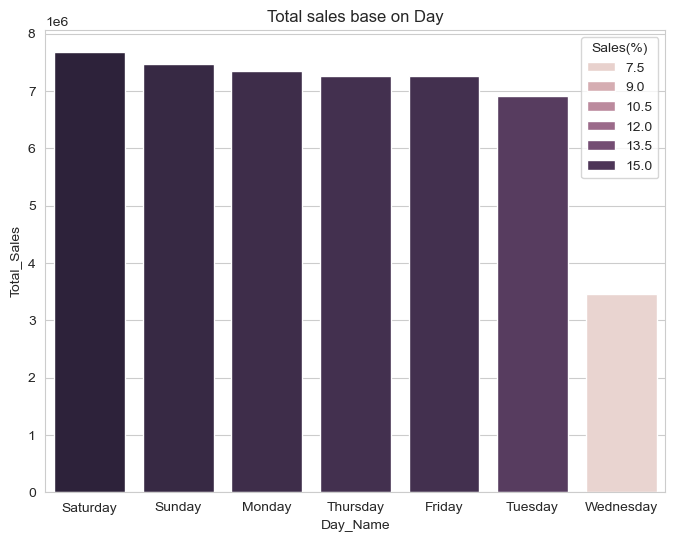

In [55]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,6))
sns.barplot(data=sales_qty_percentage, x='Day_Name',y='Total_Sales',hue='Sales(%)')
plt.title('Total sales base on Day')
plt.show()

## Understand sales and quantity base on date

In [58]:
sales_date = merge_data.groupby('Date')[['Total_Sales','Quantity']].sum().sort_values(by='Date', ascending = True)
sales_date = pd.DataFrame(sales_date).reset_index() # convert to dataframe

sales_date

,Date,Total_Sales,Quantity
0,2015-12-03,3762000,1165
1,2015-12-04,3588000,1155
2,2015-12-05,3812000,1231
3,2015-12-06,3872000,1239
4,2015-12-07,3755000,1183
5,2015-12-08,3558000,1126
6,2015-12-09,3457000,1121
7,2015-12-10,3502000,1104
8,2015-12-11,3669000,1190
9,2015-12-12,3862000,1205


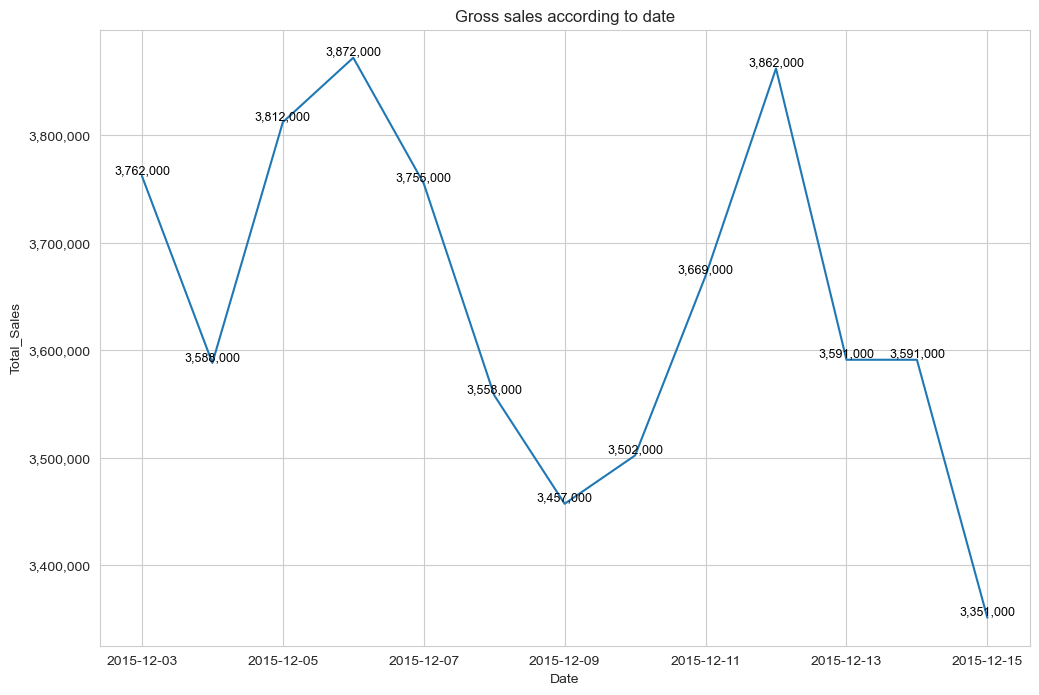

In [60]:
import matplotlib.ticker as mticker

plt.figure(figsize=(12,8))
sns.lineplot(data=sales_date,x='Date',y='Total_Sales')
plt.title('Gross sales according to date')
# Use a scalar formatter to show full numbers
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
# Show data label
for i in range(len(sales_date)):
    x = sales_date['Date'].iloc[i]
    y = sales_date['Total_Sales'].iloc[i]
    plt.text(x, y, f'{int(y):,}', ha='center', va='bottom', fontsize=9, color='black')
plt.show()

## Observed daily achived base on daily target

In [63]:
daily_sales = merge_data.groupby('Date')[['Total_Sales']].sum().sort_values(by='Date',ascending = True)
daily_sales = pd.DataFrame(daily_sales).reset_index()

daily_sales 

,Date,Total_Sales
0,2015-12-03,3762000
1,2015-12-04,3588000
2,2015-12-05,3812000
3,2015-12-06,3872000
4,2015-12-07,3755000
5,2015-12-08,3558000
6,2015-12-09,3457000
7,2015-12-10,3502000
8,2015-12-11,3669000
9,2015-12-12,3862000


#### Load daily target csv file

In [66]:
daily_target = pd.read_csv('Daily-Sales-Target.csv')
daily_target = pd.DataFrame(daily_target) # Convert to dataframe

daily_target = daily_target.rename(columns={'Day':'Date'}) # Rename Day columns to Date columns
daily_target['Date'] = pd.to_datetime(daily_target['Date']) # Convert to datetime datatype


daily_target

,Date,Target
0,2015-12-03,4138200
1,2015-12-04,2870400
2,2015-12-05,4193200
3,2015-12-06,3872000
4,2015-12-07,4506000
5,2015-12-08,4269600
6,2015-12-09,4148400
7,2015-12-10,3852200
8,2015-12-11,2935200
9,2015-12-12,3475800


#### Merge daily_sales data and daily_target data and calculate achivedment percentage

In [69]:
daily_achived = daily_sales.merge(daily_target,on='Date')
daily_achived['Achived(%)'] = round(daily_achived['Total_Sales']/daily_achived['Target']*100,2)
daily_achived

,Date,Total_Sales,Target,Achived(%)
0,2015-12-03,3762000,4138200,90.91
1,2015-12-04,3588000,2870400,125.00
2,2015-12-05,3812000,4193200,90.91
3,2015-12-06,3872000,3872000,100.00
4,2015-12-07,3755000,4506000,83.33
5,2015-12-08,3558000,4269600,83.33
6,2015-12-09,3457000,4148400,83.33
7,2015-12-10,3502000,3852200,90.91
8,2015-12-11,3669000,2935200,125.00
9,2015-12-12,3862000,3475800,111.11


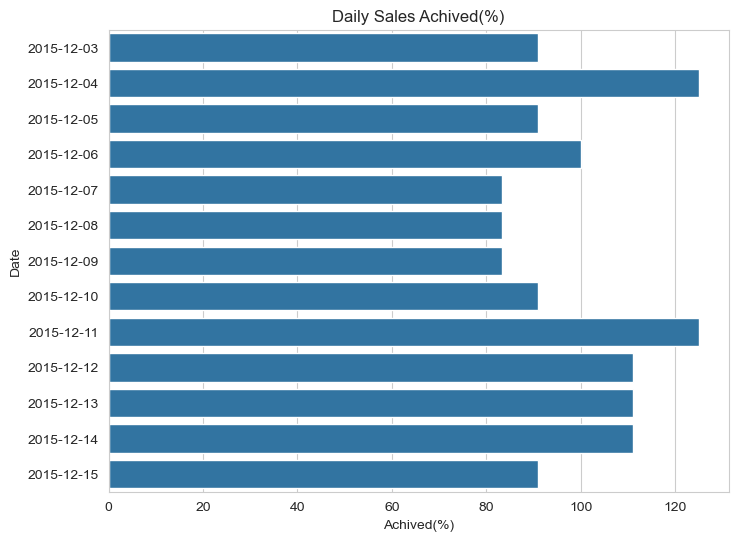

In [71]:
plt.figure(figsize=(8,6))
sns.barplot(data=daily_achived,x='Achived(%)',y='Date',orient='h')
plt.title('Daily Sales Achived(%)')
plt.show()

## Pizza sales target analysis

In [74]:
pizza_sales = merge_data.groupby('Pizza Sold')[['Total_Sales']].sum().sort_values(by='Total_Sales',ascending=False)
pizza_sales = pd.DataFrame(pizza_sales).reset_index() # convert to dataframe
pizza_sales = pizza_sales.rename(columns={'Pizza Sold':'Pizza'}) # Rename columns name Pizza Sold as Pizza
pizza_sales

,Pizza,Total_Sales
0,Hot Pepperoni Feast,4292000
1,Chicken Suya,3824000
2,BBQ Philly Steak,3808000
3,Hot Veggie,3800000
4,Pepperoni Feast,3628000
5,BBQ Chicken,3600000
6,Margarita,3484000
7,Pepperoni Suya,3231000
8,Veggie Supreme,3027000
9,Italiano,2955000


#### Load pizza sales target data

In [77]:
pizza_target = pd.read_csv('Sales-Target.csv')
pizza_target = pd.DataFrame(pizza_target)
pizza_target

,Pizza,Sales Target
0,BBQ Chicken,4320000
1,BBQ Philly Steak,3808000
2,Beef Suya,2943000
3,Chicken Bali,1600200
4,Chicken Feast,1395200
5,Chicken Legend,1766000
6,Chicken Suya,3441600
7,Extravaganza,1451200
8,Hot Pepperoni Feast,4292000
9,Hot Veggie,3040000


### Merge pizza sales data and pizza_target data and calculate sales achived(%)

In [80]:
sales_achived = pizza_sales.merge(pizza_target,on='Pizza')
sales_achived['Achived(%)'] = round(sales_achived['Total_Sales']/sales_achived['Sales Target']*100,2)
sales_achived

,Pizza,Total_Sales,Sales Target,Achived(%)
0,Hot Pepperoni Feast,4292000,4292000,100.00
1,Chicken Suya,3824000,3441600,111.11
2,BBQ Philly Steak,3808000,3808000,100.00
3,Hot Veggie,3800000,3040000,125.00
4,Pepperoni Feast,3628000,3265200,111.11
5,BBQ Chicken,3600000,4320000,83.33
6,Margarita,3484000,3832400,90.91
7,Pepperoni Suya,3231000,2907900,111.11
8,Veggie Supreme,3027000,2421600,125.00
9,Italiano,2955000,3250500,90.91


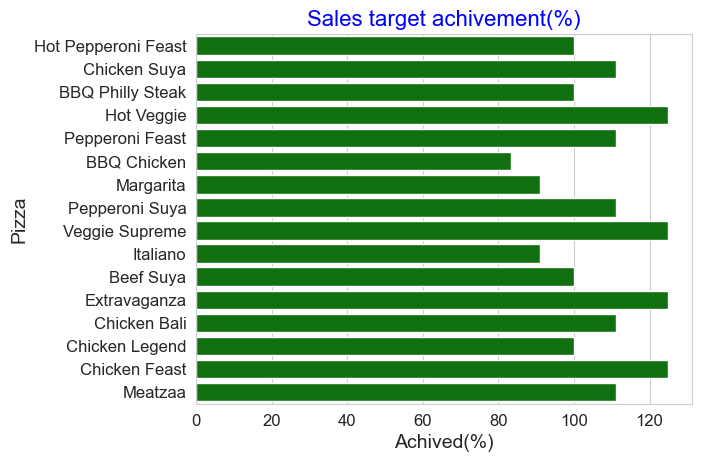

In [82]:
plt.figure(figure=(8,6))
sns.barplot(data=sales_achived,x='Achived(%)',y='Pizza', color='green')
plt.title('Sales target achivement(%)', fontsize=16, color = 'Blue')
plt.xlabel('Achived(%)',fontsize=14)
plt.ylabel('Pizza',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()